
## Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model. tensorflow playground example neural network.
![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-replication-exercise.png) 

Try this network out for yourself on the TensorFlow Playground website. Hint: there are 5 hidden layers but the output layer isn't pictured, you'll have to decide what the output layer should be based on the input data.

## Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [2]:
import tensorflow as tf
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(6,activation='relu',input_shape=(2,)),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
model_1.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 193
Trainable params: 193
Non-trainable params: 0
________________________________________________________

In [14]:
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make 1000 examples
n_samples = 1000
# Create circles
X,y = make_moons(n_samples,noise=0.03,random_state=42)


In [15]:
X[:10]

array([[-0.00933187,  0.39098105],
       [ 0.95457387, -0.47375583],
       [ 0.9185256 , -0.42519648],
       [ 0.41276802, -0.37638459],
       [-0.84532016,  0.52879908],
       [ 0.57954249, -0.35297867],
       [ 0.29488426, -0.20923768],
       [-0.01448804,  0.4358961 ],
       [ 1.62651037, -0.28120742],
       [ 0.67159767,  0.78642227]])

In [16]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [17]:
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

In [23]:
moons = pd.DataFrame({'X0':X[:,0],'X1':X[:,1],'label':y})
moons

,X0,X1,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0
...,...,...,...
995,0.793018,0.591402,0
996,-0.138777,0.968000,0
997,1.653915,-0.291798,1
998,-0.934102,0.353582,0


In [13]:
y = pd.DataFrame(y)
y

,0
0,1
1,1
2,1
3,1
4,0
...,...
995,0
996,0
997,1
998,0


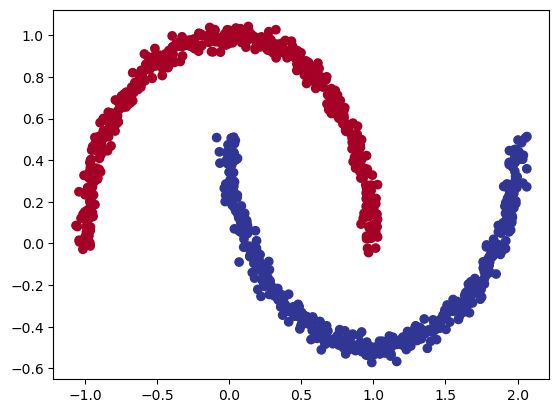

In [24]:
# Let's visualize the data
plt.scatter(X[:,0],X[:,1],cmap=plt.cm.RdYlBu,c=y)

In [28]:
# Let's create a model
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(150,activation='relu'),
    tf.keras.layers.Dense(150,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
model_2.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
model_2.fit(X,y,epochs=20)
model_2.evaluate(X,y)

Epoch 1/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.8420
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2665 - accuracy: 0.8670
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2215 - accuracy: 0.8920
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1978 - accuracy: 0.8990
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1745 - accuracy: 0.9110
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1404 - accuracy: 0.9380
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1009 - accuracy: 0.9630
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0679 - accuracy: 0.9830
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0440 - accuracy: 0.9920
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 0.9970
Epoch 11/20
32/32 [

[0.0023606764152646065, 1.0]

In [29]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


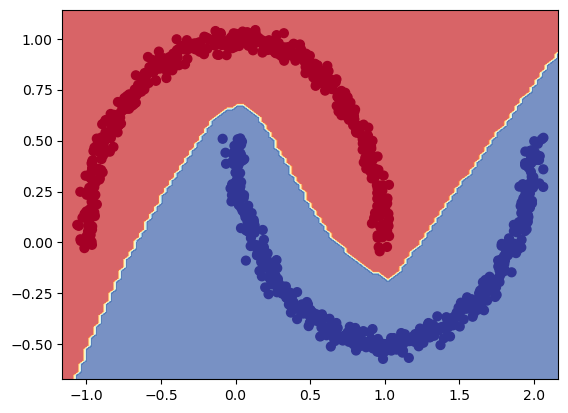

In [31]:
# Plotting a boundary
plot_decision_boundary(model_2,X,y)

### Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the classifcation tutorial in the TensorFlow documentation for ideas.

In [32]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [33]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [34]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [35]:
train_images.shape, len(train_labels)

((60000, 28, 28), 60000)

In [36]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [37]:
test_images.shape, len(test_labels)

((10000, 28, 28), 10000)

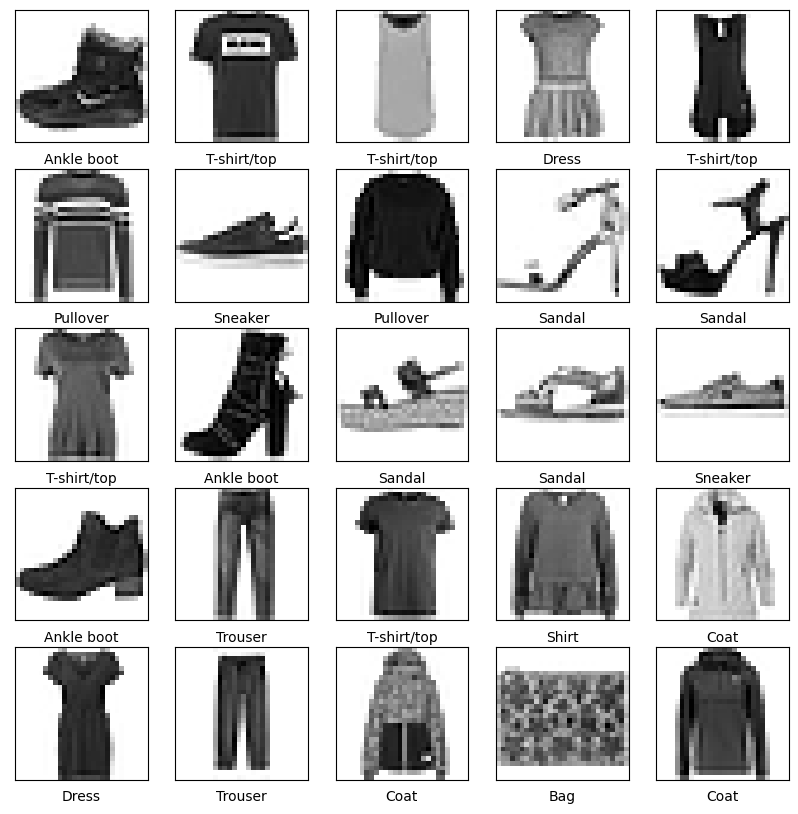

In [38]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [187]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10),
])
model_3.compile(optimizer=tf.keras.optimizers.Adam(lr=0.005),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model_3.fit(train_images,train_labels,epochs=50,validation_data=(test_images,test_labels))

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1849 - accuracy: 0.7408 - val_loss: 0.7506 - val_accuracy: 0.7514
Epoch 2/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6458 - accuracy: 0.7878 - val_loss: 0.7074 - val_accuracy: 0.7703
Epoch 3/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5992 - accuracy: 0.8058 - val_loss: 0.5802 - val_accuracy: 0.7986
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5579 - accuracy: 0.8152 - val_loss: 0.6356 - val_accuracy: 0.7937
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4937 - accuracy: 0.8334 - val_loss: 0.5319 - val_accuracy: 0.8316
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4551 - accuracy: 0.8415 - val_loss: 0.4794 - val_accuracy: 0.8404
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4217 - accuracy: 0.8513 - val_loss: 0.5135 - val_accuracy:

In [72]:
test_loss, test_acc = model_3.evaluate(test_images,test_labels)
print(f'Test Accuracy: {test_acc*100}')

313/313 [==============================] - 0s 1ms/step - loss: 0.4814 - accuracy: 0.8422
Test Accuracy: 84.2199981212616


In [191]:
probability_model = tf.keras.Sequential([model_3, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0], np.argmax(predictions[0])

(array([5.0904544e-23, 3.7091783e-34, 0.0000000e+00, 2.0492983e-37,
        4.3011225e-30, 1.1994768e-03, 8.2154774e-31, 1.6396876e-01,
        2.7117499e-06, 8.3482909e-01], dtype=float32),
 9)

In [75]:
np.argmax(predictions[0]),test_labels[0]

(9, 9)

In [96]:
import random
def plt_images(i,predictions_array,true_label,img):
    # r = [random.choices(tf.range(len(test_images))) for i in range(r)]
    # for i in range(len(r)):
    true_label, img = true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
        
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{}{:2.0f}% ({})".format(class_names[predicted_label],
                                            100*np.max(predictions_array),
                                            class_names[true_label]),
                                            color=color)
        

In [102]:
# r  = 3
i=0
# plot_image(i,predictions,test_labels,test_images)

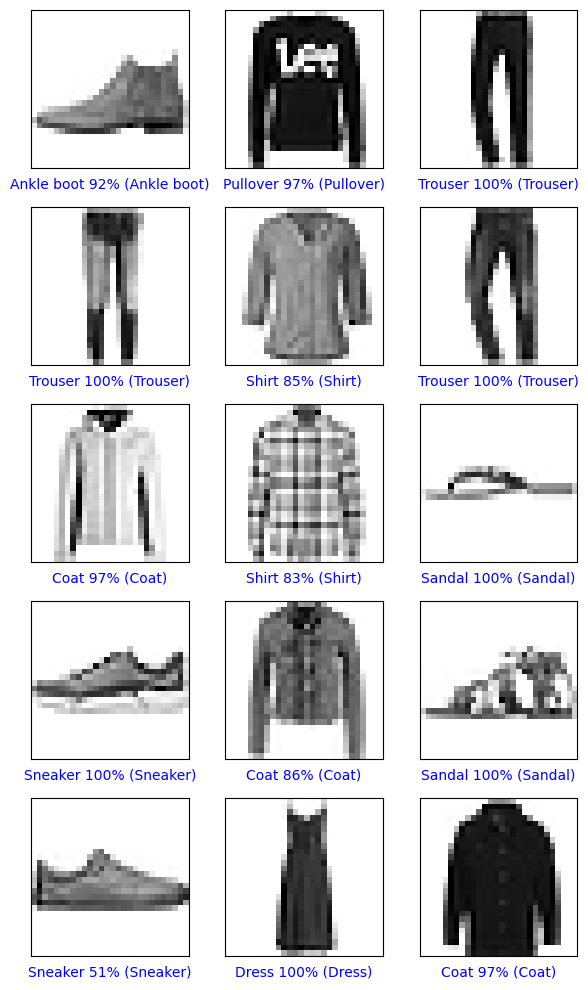

In [139]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, predictions[i], test_labels, test_images)

plt.tight_layout()
plt.show()

In [167]:
tensor = tf.constant([[1.3,5.1,2.2],[2.0,1.0,0.1]])
tensor

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1.3, 5.1, 2.2],
       [2. , 1. , 0.1]], dtype=float32)>

In [182]:
def softmax(x):
    denominator= tf.reduce_sum(tf.math.exp(x),axis=1)
    
    sm = []
    for i in range(len(x)):
        for j in x[i]:
            k = tf.exp(j)/denominator[i]
            sm.append(k)
    return pd.DataFrame(sm)
softmax(tensor)


,0
0,0.020764
1,0.928166
2,0.051071
3,0.659001
4,0.242433
5,0.098566


In [170]:
pd.DataFrame(tf.keras.activations.softmax(tensor).numpy())

,0,1,2
0,0.020764,0.928166,0.051071
1,0.659001,0.242433,0.098566


In [172]:
for i in tensor:
    print(i)

tf.Tensor([1.3 5.1 2.2], shape=(3,), dtype=float32)
tf.Tensor([2.  1.  0.1], shape=(3,), dtype=float32)


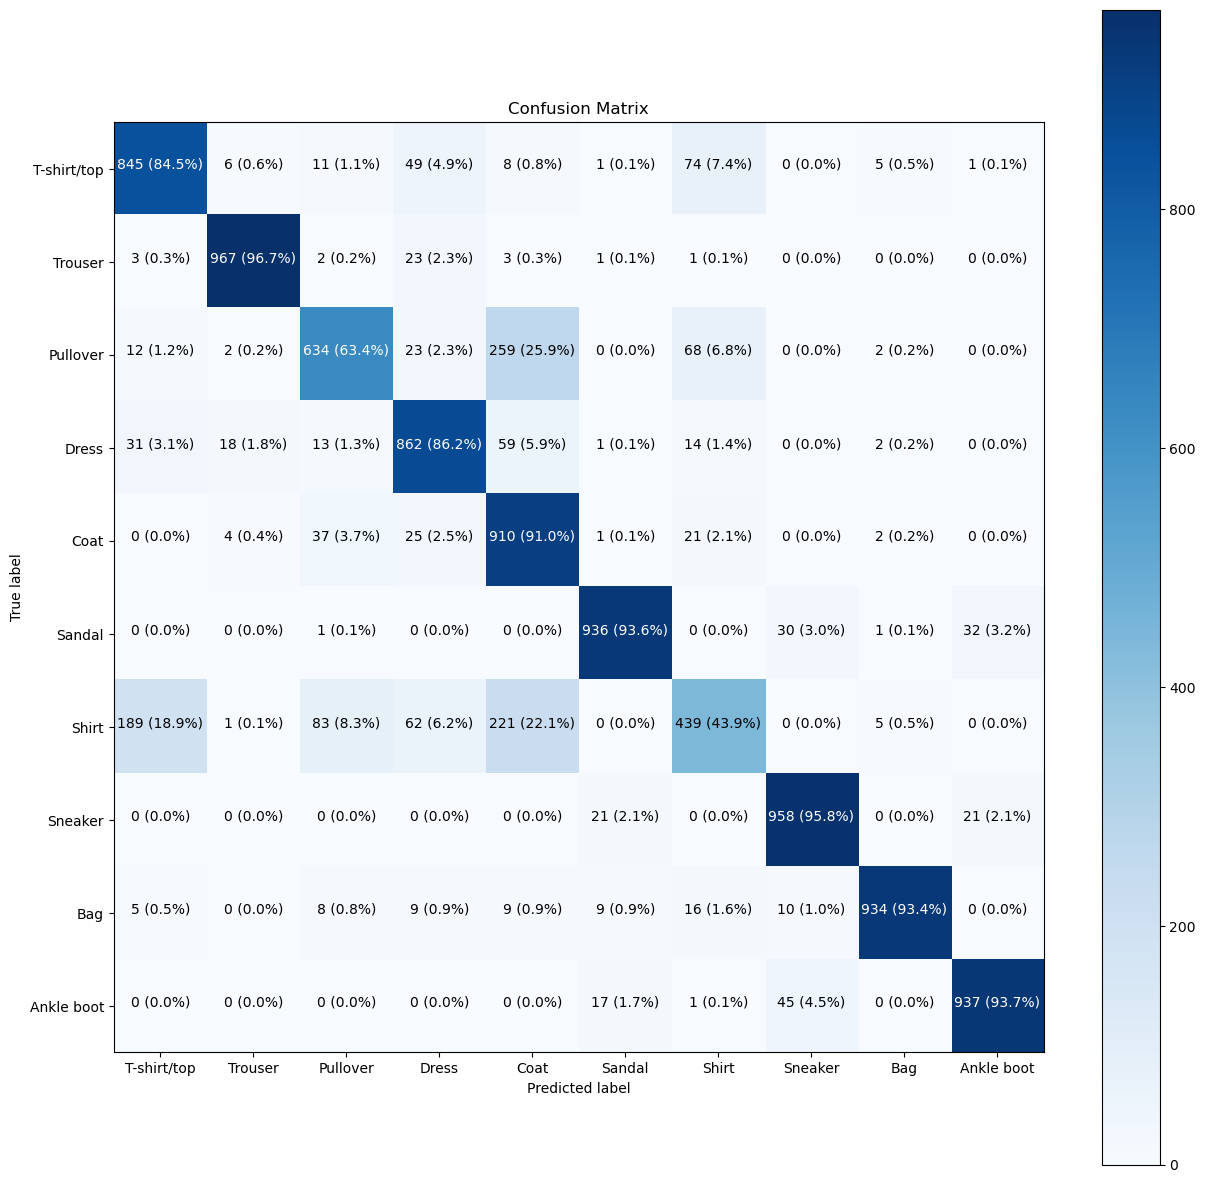

In [185]:
# Let's Create a function to display confusion matrix
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix
# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15, 15), text_size=10):
    
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.

    Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

    Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.
    
    Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                      y_pred=y_preds, # predicted labels
                      classes=class_names, # array of class label names
                      figsize=(15, 15),
                      text_size=10)
    """  
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)
    
    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
    

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes), # create enough axis slots for each class
           yticks=np.arange(n_classes), 
           xticklabels=labels, # axes will labeled with class names (if they exist) or ints
           yticklabels=labels)
          
     # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    
    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2
    
    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)
                
make_confusion_matrix(test_labels,np.argmax(predictions,axis=1),class_names)

In [186]:
model_3.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 711us/step - loss: 0.4814 - accuracy: 0.8422


[0.48137664794921875, 0.842199981212616]

In [193]:
preds = pd.DataFrame(np.argmax(predictions,axis=1))
preds

,0
0,9
1,2
2,1
3,1
4,6
...,...
9995,9
9996,1
9997,8
9998,1


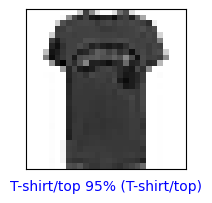

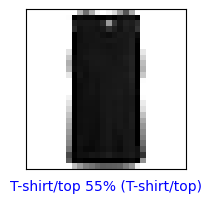

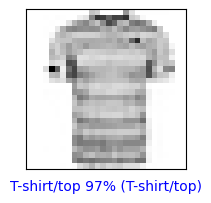

In [222]:

indexes = preds[preds.values == 0].index
for i in range(len(indexes[:3])):
    plt.figure(figsize=(7,7))
    plt.subplot(1,3,i+1)
  
    plot_image(indexes[i],predictions[indexes[i]],test_labels,test_images)
    